In [2]:
import numpy as np
import csv
import matplotlib.pyplot as plt
import platform

In [3]:
class CovidTimeSeries(object):
    """ Stores the JHU time series data for a county for covid """
    def __init__(self):
        self.dates = None
        self.regionCode= None
        self.regionName=None
        self.positive=None  #Infected used by the paper
        self.Lat=None 
        self.Long=None
        self.Combined_Key=None #unused
        self.healed=None   #Recovered
        self.totalCases=None
        self.tested = None
        self.deaths=None 
        self.hospitalized = None
        self.vaccinated = None
        self.recentVacc = 0

class ItalianDatabase(object):
    """ Stores the covid-19 data"""
    def __init__(self):
        self.CovidData={}
        self.DateRange=[]
      
    def loadTimeSeries(self, filenameI, startdate, enddate, fields):
        """ load the infections data from filenameI and death data from filenameD
            from startdate to enddate
        """
        csvfile=open(filenameI, newline='',  encoding='UTF-8')
        rd = csv.reader(csvfile, delimiter=',')
        data=[]
        for lv in rd:
                data.append(lv)

        header=data[0]
        
        infectionData=(data[1:])
        temp = np.array(infectionData)
        dates = temp[:,0]
        dates = dates.tolist()


        startdate_index=dates.index(startdate)
        enddate_index=dates.index(enddate)
        dRange = enddate_index - startdate_index + 1

        CountyD={}
        N=len(infectionData);
        for i in range(N):
            if not dateInRange(startdate,enddate,infectionData[i][0]):
                continue
            if int(float(infectionData[i][2])) not in CountyD: #if key not already initialized
            
                c1=CovidTimeSeries()
                c1.regionCode = infectionData[i][2]
                c1.regionName = infectionData[i][3]
                c1.Lat = float(infectionData[i][4])
                c1.Long = float(infectionData[i][5])
                
                fp=infectionData[i][2]
                x=int(float(fp))
                c1.dates = [infectionData[i][0]]
                c1.deaths = [float(infectionData[i][header.index(fields[2])])]
                c1.positive = [float(infectionData[i][header.index(fields[0])])]
                
                c1.healed = [float(infectionData[i][header.index(fields[1])])]
    
                CountyD[x]=c1
            else: #if key already initialized
                fp=infectionData[i][2]
                x=int(float(fp))
                CountyD[x].positive.append(float(infectionData[i][header.index(fields[0])]))
                CountyD[x].deaths.append(float(infectionData[i][header.index(fields[2])]))
                CountyD[x].dates.append(infectionData[i][0])
                CountyD[x].healed.append(float(infectionData[i][header.index(fields[1])]))
            
        for key in CountyD: #Turn the lists into arrays
            CountyD[key].deaths = np.array(CountyD[key].deaths)
            CountyD[key].positive = np.array(CountyD[key].positive)
            CountyD[key].healed = np.array(CountyD[key].healed)
            CountyD[key].totalCases = np.array(CountyD[key].totalCases)
            CountyD[key].tested = np.array(CountyD[key].tested)
            CountyD[key].dates = np.array(CountyD[key].dates)
        self.DateRange=dRange
        self.CovidData=CountyD


class CovidTrackingDatabase(object):
    """ Stores the covid-19 data"""
    def __init__(self):
        self.CovidData={}
        self.DateRange=[]
      
    def loadTimeSeries(self, filenameI, startdate, enddate, fields):
        """ load the infections data from filenameI and death data from filenameD
            from startdate to enddate
        """
        csvfile=open(filenameI, newline='',  encoding='UTF-8')
        rd = csv.reader(csvfile, delimiter=',')
        data=[]
        for lv in rd:
            if(lv[0] == 'date'):
                data.insert(0,lv)
            else:
                data.insert(1,lv)
        header=data[0]
        
        infectionData=(data[1:])
        temp = np.array(infectionData)
        dates = temp[:,0]
        dates = dates.tolist()


        startdate_index=dates.index(startdate)
        enddate_index=dates.index(enddate)
        dRange = enddate_index - startdate_index + 1

        CountyD={}
        N=len(infectionData);

        for i in range(N):
            if not (dateInRange(startdate,enddate,infectionData[i][0])):
                continue
            if infectionData[i][1] not in CountyD: #if key not already initialized
                c1=CovidTimeSeries()
                
                fp=infectionData[i][1]
                x=fp
                c1.dates = [infectionData[i][0]]
                c1.regionName = infectionData[i][1]
                if(infectionData[i][header.index(fields[2])] == ''): #Hospitalized
                    c1.hospitalized = [float(0)]
                else:
                    c1.hospitalized = [float(infectionData[i][header.index(fields[2])])]
                    
                if(infectionData[i][header.index(fields[0])] == ''): #Deaths
                    c1.deaths = [float(0)]
                else:
                    c1.deaths = [float(infectionData[i][header.index(fields[0])])]  
                    
                if(infectionData[i][header.index(fields[1])] == ''): #Infected
                    c1.positive = [float(0)]
                else:
                    c1.positive = [float(infectionData[i][header.index(fields[1])])]      
               
                if(infectionData[i][header.index(fields[3])] == ''): #Recovered
                    c1.healed = [float(0)]
                else:
                    c1.healed = [float(infectionData[i][header.index(fields[3])])]  
              
                CountyD[x]=c1
            else: #if key already initialized
                fp=infectionData[i][1]
                x=fp
                if(infectionData[i][header.index(fields[2])] == ''): #Hospitalized
                    CountyD[x].hospitalized.append(float(0))
                else:
                    CountyD[x].hospitalized.append(float(infectionData[i][header.index(fields[2])]))
                    
                if(infectionData[i][header.index(fields[1])] == ''): #Infected
                    CountyD[x].positive.append(float(0))
                else:
                    CountyD[x].positive.append(float(infectionData[i][header.index(fields[1])])) 
                    
                if(infectionData[i][header.index(fields[0])] == ''): #Deaths
                    CountyD[x].deaths.append(float(0))
                else:
                    CountyD[x].deaths.append(float(infectionData[i][header.index(fields[0])]))
                    
                if(infectionData[i][header.index(fields[3])] == ''): #Recovered
                    CountyD[x].healed.append(float(0))
                else:
                    CountyD[x].healed.append(float(infectionData[i][header.index(fields[3])]))
        
                CountyD[x].dates.append(infectionData[i][0])
               
        for key in CountyD: #Turn the lists into arrays
            CountyD[key].deaths = np.array(CountyD[key].deaths)
            CountyD[key].positive = np.array(CountyD[key].positive)
            CountyD[key].healed = np.array(CountyD[key].healed)
            CountyD[key].totalCases = np.array(CountyD[key].totalCases)
            CountyD[key].tested = np.array(CountyD[key].tested)
            CountyD[key].dates = np.array(CountyD[key].dates)
            CountyD[key].hospitalized = np.array(CountyD[key].hospitalized)
        self.DateRange=dRange
        self.CovidData=CountyD
        
def toWeekPeriod(filename,newName):
    csvfile=open(filename, newline='', encoding='UTF-8')
    rd = csv.reader(csvfile, delimiter=',')
    data=[]
    for lv in rd: #generating the data matrix
        data.append(lv)
    header = data[0] #get the labels
    infectionData=(data[1:]) #data without the labels
    infectionData = np.array(infectionData)
    dates = infectionData[:,0]
    N = int(np.ceil(np.shape(dates)[0] / 7))
    length = np.shape(dates)[0]
    difference = N * 7 - length
    if(difference != 0):
        N = N -1
    print(difference)
    
    infected = np.zeros(N * 7)
    tested  = np.zeros(N * 7)
    recovered = np.zeros(N * 7)
    deaths = np.zeros(N * 7)
    
    
    infected[:] = infectionData[:length -(7- difference),1].astype(np.float)
    tested[:] = infectionData[:length - (7- difference),2].astype(np.float)
    recovered[:] = infectionData[:length - (7- difference),3].astype(np.float)
    deaths[:] = infectionData[:length - (7- difference),4].astype(np.float)
   
    newDates = np.zeros((N))
    newDates = newDates.tolist()
    newInfect = np.zeros((N))
    newTested = np.zeros(N)
    newRecov = np.zeros(N)
    newDead = np.zeros(N)
    wanted = np.zeros((N,5))
    wanted = wanted.tolist()
    for i in range(N):
        temp = i * 7
        newDates[i] = dates[temp]
        newInfect[i] = infected[temp] + infected[temp + 1] + infected[temp + 2] + infected[temp + 3] + infected[temp + 4] + infected[temp + 5] + infected[temp + 6]
        newRecov[i] = recovered[temp] + recovered[temp + 1] + recovered[temp + 2] + recovered[temp + 3] + recovered[temp + 4] + recovered[temp + 5] + recovered[temp + 6]
        newDead[i] = deaths[temp] + deaths[temp + 1] + deaths[temp + 2] + deaths[temp + 3] + deaths[temp + 4] + deaths[temp + 5] + deaths[temp + 6]
        newTested[i] = tested[temp] + tested[temp + 1] + tested[temp + 2] + tested[temp + 3] + tested[temp + 4] + tested[temp + 5] + tested[temp + 6]
        wanted[i][0] = newDates[i].astype(np.str)
        wanted[i][1] = newInfect[i].astype(np.str)
        wanted[i][2] = newTested[i].astype(np.str)
        wanted[i][3] = newRecov[i].astype(np.str)
        wanted[i][4] = newDead[i].astype(np.str)
    fields = ['Dates', 'Infected', 'Tested', 'Recovered', 'Deaths']
    # writing to csv file 
    with open(newName + "(Weeks).csv" , 'w', newline = '') as csvfile: 
        # creating a csv writer object 
        csvwriter = csv.writer(csvfile, delimiter = ',') 
        
        # writing the fields 
        csvwriter.writerow(fields) 
        
        # writing the data rows 
        csvwriter.writerows(wanted)
    

def addVacc(filenameV,state, startdate, enddate):
    #Load all vaccination data
    csvfile = open(filenameV, newline = '', encoding = 'UTF-8')
    rd = csv.reader(csvfile, delimiter = ',')
    dataV = []
    for lv in rd:
            dataV.append(lv)
    headerV = dataV[0]
    infectionDataV = (dataV[1:])
    temp = np.array(infectionDataV)
    
    #Pull date and state data
    datesV = temp[:,0]
    datesV = datesV.tolist()
    states = temp[:,1]
    states = states.tolist()
    
    #Get the indexes for the state wanted
    firstIndex = states.index(state)
    lastIndex = firstIndex
    while(states[lastIndex] == state):
        lastIndex += 1
    
    #Put state data into an array
    newData = np.zeros((lastIndex - firstIndex + 1, 2))
    newData = newData.astype(np.str)
    newData[:,0] = temp[firstIndex:lastIndex+1,0]
    newData[:,1] = temp[firstIndex:lastIndex+1,7]
    
    #Get correct date indexes 
    temp2 = newData[:,0].tolist()
    startIndex = temp2.index(startdate)
    endIndex = temp2.index(enddate)
    
    #Put correct data in vacc array
    vacc = newData[startIndex:endIndex+1,1]
    
    #Convert all empty cells to the previous vaccination count
    preV = '0'
    for i in range(np.shape(vacc)[0]):
        if(vacc[i] == ''):
            vacc[i] = preV
        else:
            preV = vacc[i]
    vacc = vacc.astype(np.float)
    return vacc

def dateInRange(startdate, enddate, date): # See if a date is within the desired range
    #Get start date in desired format
    sDate = np.array(startdate.split('/'))
    if (len(sDate[0]) == 1):
        sDate[0] = '0' + sDate[0]
    if (len(sDate[1]) == 1):
        sDate[1] = '0' + sDate[1]
    sDateT = sDate[2] + sDate[0] + sDate[1]
    sDateT = int(sDateT)
    
    #Get end date in desired format
    eDate = np.array(enddate.split('/'))
    if (len(eDate[0]) == 1):
        eDate[0] = '0' + eDate[0]
    if (len(eDate[1]) == 1):
        eDate[1] = '0' + eDate[1]
    eDateT = eDate[2] + eDate[0] + eDate[1]
    eDateT = int(eDateT)
    
    #Get actual date in desired format
    date = np.array(date.split('/'))
    if (len(date[0]) == 1):
        date[0] = '0' + date[0]
    if (len(date[1]) == 1):
        date[1] = '0' + date[1]
    dateT = date[2] + date[0] + date[1]
    dateT = int(dateT)
    
    if sDateT<=dateT<=eDateT: 
        return True
    else:
        return False           

# Combining Covid Tracking and Vaccination Data into a new File

In [5]:
if platform.system() == "Windows":
    pathc="..\\Data\\"
elif platform.system() == "Linux":
    pathc="../Data/"

fullDataName="all-states-history.csv"
if platform.system() == "Windows":
    pathV="..\\Data\\Vaccination Data\\"
elif platform.system() == "Linux":
    pathV="../Data/Vaccination Data/"
vaccinationName = "us_state_vaccinations.csv"

startdate='1/12/2021'
enddate='3/7/2021'
fields = ['death', 'positive', 'hospitalized','recovered']
state = "Alabama"
database=CovidTrackingDatabase();
database.loadTimeSeries(pathc+fullDataName, startdate, enddate,fields)
vacc = addVacc(pathV+vaccinationName, state, startdate, enddate )

CountyD=database.CovidData
state = 'AL'
for key in CountyD:
    wanted = np.zeros((np.shape(CountyD[key].dates)[0],5))

    wanted = wanted.tolist()
    break
for key in CountyD:
    if CountyD[key].regionName == state:
        tempDeaths = CountyD[key].deaths
        tempRecovered = CountyD[key].healed
        tempInfected = CountyD[key].positive
        tempHosp = CountyD[key].hospitalized
        tempDates = CountyD[key].dates

        for N in range(np.shape(CountyD[key].dates)[0]):
           
            wanted[N][0] = tempDates[N]
            wanted[N][1] = tempInfected[N]
            wanted[N][2] = vacc[N]
            wanted[N][3] = tempRecovered[N]
            wanted[N][4] = tempDeaths[N]

filename = state+".csv"
fields = ['Dates', 'Infected','Vaccinated', 'Recovered', 'Deaths']
# writing to csv file 
with open(filename, 'w', newline = '') as csvfile: 
    # creating a csv writer object 
    csvwriter = csv.writer(csvfile, delimiter = ',') 
        
    # writing the fields 
    csvwriter.writerow(fields) 
        
    # writing the data rows 
    csvwriter.writerows(wanted)

# Load Covid Tracking State Data into a File

In [11]:
if platform.system() == "Windows":
    pathc="..\\Data\\"
elif platform.system() == "Linux":
    pathc="../Data/"

fullDataName="all-states-history.csv"

startdate='3/7/2020'
enddate='3/7/2021'

database=CovidTrackingDatabase();
fields = ['death', 'positive', 'hospitalized','recovered']
database.loadTimeSeries(pathc+fullDataName, startdate, enddate,fields)
CountyD=database.CovidData

state = 'ID'
for key in CountyD:
    wanted = np.zeros((np.shape(CountyD[key].dates)[0],5))
    wanted = wanted.tolist()
    break
for key in CountyD:
    if CountyD[key].regionName == state:
        tempDeaths = CountyD[key].deaths
        tempRecovered = CountyD[key].healed
        tempInfected = CountyD[key].positive
        tempHosp = CountyD[key].hospitalized
        tempDates = CountyD[key].dates
        for N in range(np.shape(CountyD[key].dates)[0]):
            wanted[N][0] = tempDates[N]
            wanted[N][1] = tempInfected[N]
            wanted[N][2] = tempHosp[N]
            wanted[N][3] = tempRecovered[N]
            wanted[N][4] = tempDeaths[N]

filename = state+".csv"
fields = ['Dates', 'Infected','Hospitalized', 'Recovered', 'Deaths']
# writing to csv file 
with open(filename, 'w', newline = '') as csvfile: 
    # creating a csv writer object 
    csvwriter = csv.writer(csvfile, delimiter = ',') 
        
    # writing the fields 
    csvwriter.writerow(fields) 
        
    # writing the data rows 
    csvwriter.writerows(wanted)

13
[0.18808476 0.16672321 0.14600297 0.12594307 0.10726585 0.0916774
 0.08238091 0.07665981 0.07324901 0.07329986 0.07793227 0.08739746
 0.10056251 0.11663556 0.1343021  0.15272297 0.17156834 0.19048862
 0.20949152 0.22835832 0.24715389 0.26587839 0.28457579 0.30314148
 0.32154793 0.33977778]


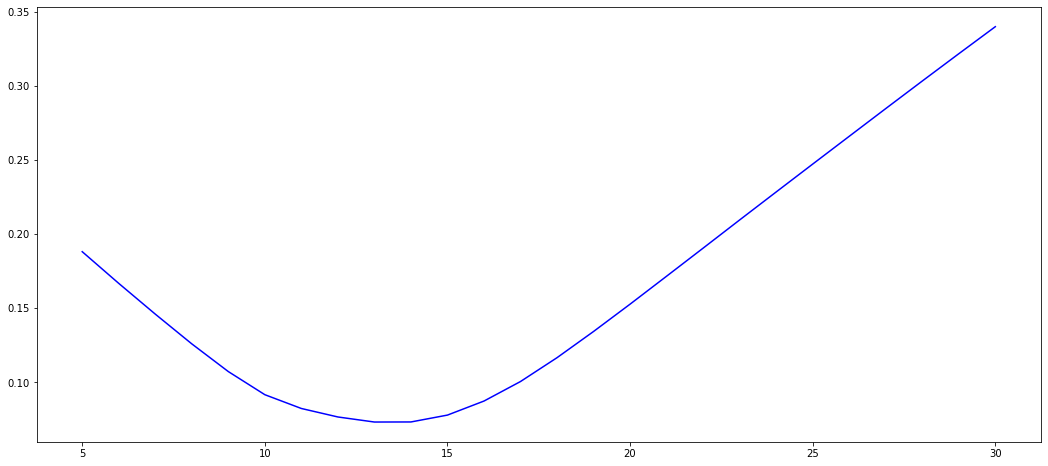

In [34]:
if platform.system() == "Windows":
    pathc="..\\Data\\"
elif platform.system() == "Linux":
    pathc="../Data/"

fullDataName="all-states-history.csv"

startdate='3/7/2020'
enddate='3/7/2021'

database=CovidTrackingDatabase();
fields = ['death', 'positive', 'hospitalized','recovered']
database.loadTimeSeries(pathc+fullDataName, startdate, enddate,fields)
CountyD=database.CovidData
meanE = 0
eE = []
withR = ['AR','SD','TN','WI']
for j in range(5,31):
    meanE = 0
    for key in CountyD:
        if key in withR:
            infectR = CountyD[key].positive
            deathsR = CountyD[key].deaths
            recovR = CountyD[key].healed
            
            numDays = 300
            daysToPredict = 30
            infect = infectR[0:numDays]
            recov = recovR[0:numDays]
            dead = deathsR[0:numDays]
            recovG = np.zeros(len(recov))
            deadD = np.diff(dead)
        
            for i in range(len(infect) - j):
                recovG[i + j] = infect[i] - dead[i+j-1]
            temp = []
            for i in range(len(recov)):
                temp.append((recovG[i]-recov[i])**2)
            temp = np.array(temp)
            temp = np.mean(temp)
            temp = np.sqrt(temp)
            bot = np.mean(recov)
            meanE += (temp/bot)    
    meanE /= len(withR)
    eE.append(meanE)
eE = np.array(eE)
fig, ax = plt.subplots(figsize=(18,8))
x = np.arange(5,31)
ax.plot(x,eE, color='blue') 
print(eE.argmin() + 5)
print(eE)
          

[[[0.06141931 0.05954252 0.03931452 ... 0.06325414 0.05827625 0.        ]
  [0.08038661 0.0803298  0.0543554  ... 0.12186081 0.11472009 0.        ]]

 [[0.06475123 0.06486716 0.06635137 ... 0.12261561 0.14277812 0.        ]
  [0.08163987 0.08544304 0.09089177 ... 0.10030392 0.1180169  0.        ]]

 [[0.10608021 0.12647754 0.05938697 ... 0.10038341 0.09617734 0.        ]
  [0.1002445  0.1239861  0.06218656 ... 0.10369037 0.10009083 0.        ]]

 [[0.19941776 0.0620985  0.07740152 ... 0.1416985  0.12975913 0.        ]
  [0.24886467 0.10023041 0.12962963 ... 0.10857783 0.10192798 0.        ]]]


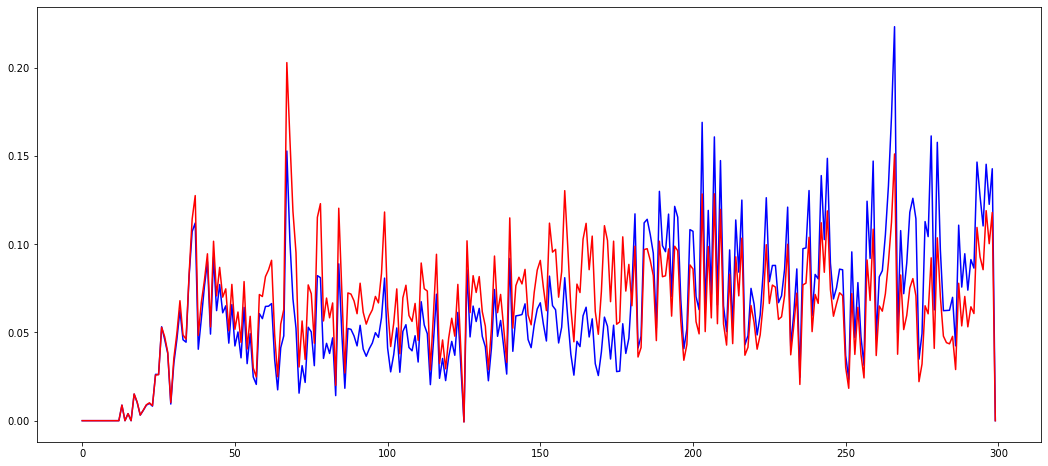

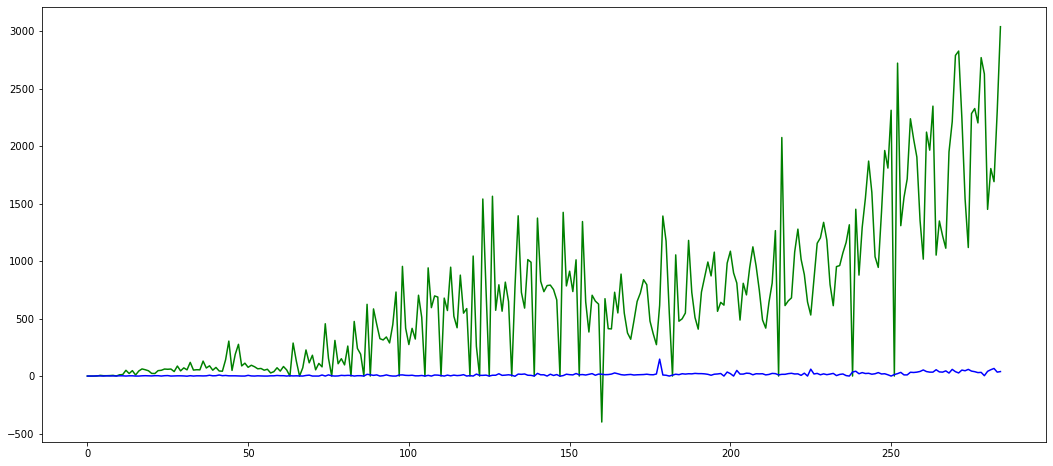

In [66]:
for key in CountyD:
    gam = np.zeros((4,2,300))
    break
counter = 0
for key in CountyD:
    if key in withR:
        infectR = CountyD[key].positive
        deathsR = CountyD[key].deaths
        recovR = CountyD[key].healed

        numDays = 300
        daysToPredict = 30
        infect = infectR[0:numDays]
        recov = recovR[0:numDays]
        dead = deathsR[0:numDays]
        recovG = np.zeros(len(recov))
        deadD = np.diff(dead)

        for i in range(len(infect) - 13):
            recovG[i + 13] = infect[i] - dead[i+13-1]
        temp = []
        for i in range(len(recov)):
            temp.append((recovG[i]-recov[i])**2)
        temp = np.array(temp)
        temp = np.mean(temp)
        temp = np.sqrt(temp)
        bot = np.mean(recov)
        meanE += (temp/bot) 
        diffI = np.diff(infect)
       # infect = infect - recov - dead
        gammaA = np.zeros(len(infect))
        for i in range(len(infect) - 14):
            gammaA[i+13] = (diffI[i] - (dead[i+14] - dead[i+13])) / (infect[i+13] - recov[i + 13] - dead[i + 13])
        gammaE = np.zeros(len(infect))
        for i in range(len(infect) - 14):
            gammaE[i+13] = (diffI[i] - (dead[i+14] - dead[i+13])) / (infect[i+13] - recovG[i + 13] - dead[i + 13])
        gam[counter][0] = gammaA
        gam[counter][1] = gammaE

        counter+=1
print(gam[:,:,60:])
fig, ax = plt.subplots(figsize=(18,8))
ax.plot(gam[1,0,:], color = 'blue') 
ax.plot(gam[1,1,:], color = 'red')
fig,ax =  plt.subplots(figsize=(18,8))
ax.plot((diffI[0:-14]), color = 'green')
ax.plot(deadD[14:], color='blue')
#ax.plot(recov, color = 'red')

# Writing Italian Data into a File

In [43]:
# Modify the path syntax based on the current platform
if platform.system() == "Windows":
    pathc="..\\Data\\Italian Data\\"
elif platform.system() == "Linux":
    pathc="../Data/Italian Data/"

fullDataName="dpc-covid19-ita-regioni.csv"

startdate='2020-02-24T18:00:00'
enddate='2021-05-18T17:00:00'

database=ItalianDatabase();
fields = ['total positive', 'resigned_healed', 'deceased']
database.loadTimeSeries(pathc+fullDataName, startdate, enddate,fields)

CountyD=database.CovidData
province = ['Emilia-Romagna']
for key in CountyD:
    wanted = np.zeros((np.shape(CountyD[key].dates)[0],4))
    wanted = wanted.tolist()
    break
for i in province:
    for key in CountyD:
        if CountyD[key].regionName == i:
            print("test")
            tempDeaths = CountyD[key].deaths
            tempRecovered = CountyD[key].healed
            tempInfected = CountyD[key].positive
            tempDates = CountyD[key].dates
            for N in range(np.shape(CountyD[key].dates)[0]):
                wanted[N][0] = tempDates[N]
                wanted[N][1] = tempInfected[N] 
                wanted[N][2] = tempRecovered[N]
                wanted[N][3] = tempDeaths[N]
filename = province[0]+".csv"
fields = ['Dates', 'Infected', 'Recovered', 'Deaths']
# writing to csv file 
with open(filename, 'w', newline = '') as csvfile: 
    # creating a csv writer object 
    csvwriter = csv.writer(csvfile, delimiter = ',') 
        
    # writing the fields 
    csvwriter.writerow(fields) 
        
    # writing the data rows 
    csvwriter.writerows(wanted)

# Italian National Data

In [6]:
if platform.system() == "Windows":
    pathc="..\\Data\\Italian Data\\"
elif platform.system() == "Linux":
    pathc="../Data/Italian Data/"

fullDataName="National Data"

toWeekPeriod(pathc+fullDataName + '.csv', fullDataName)

CountyD=database.CovidData
[N] = np.shape(CountyD[13].positive)
dates = CountyD[13].dates


popITA = 60000000

infectRaw = [0] * N
recovRaw = [0] * N
deadRaw = [0] * N
natTested = [0] * N
wanted = np.zeros((np.shape(CountyD[13].dates)[0],5))
wanted = wanted.tolist()

for key in CountyD:
    natTested += CountyD[key].tested
    infectRaw += CountyD[key].positive
    recovRaw += CountyD[key].healed
    deadRaw += CountyD[key].deaths
    
for N in range(np.shape(natTested)[0]):
                wanted[N][0] = dates[N]
                wanted[N][1] = infectRaw[N] 
                wanted[N][2] = natTested[N]
                wanted[N][3] = recovRaw[N]
                wanted[N][4] = deadRaw[N]
                
filename = "National Data.csv"
fields = ['Dates', 'Infected', 'Tested', 'Recovered', 'Deaths']
# writing to csv file 
with open(filename, 'w', newline = '') as csvfile: 
    # creating a csv writer object 
    csvwriter = csv.writer(csvfile, delimiter = ',') 
        
    # writing the fields 
    csvwriter.writerow(fields) 
        
    # writing the data rows 
    csvwriter.writerows(wanted)

450
